In [1]:
import pandas as pd
import os
import numpy   as np
import matplotlib.pyplot as plt
import glob
import json
# from algorithms.mssa import mssa
import sys

In [26]:
# sys.path.append(os.path.join(os.path.dirname(os.path.dirname(os.getcwd()))))
from algorithms.mssa import mssa
from algorithms.mssa_dist import mssa_dist
from evaluation.classification import compute_f1_score

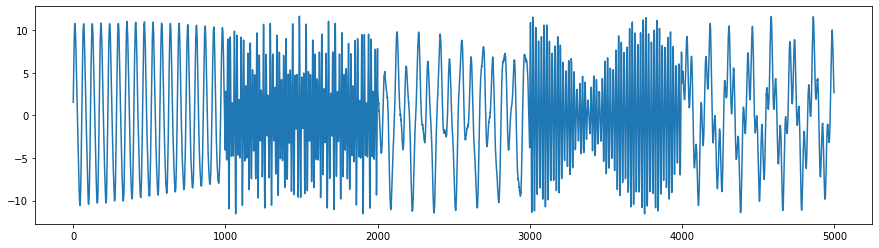

In [42]:
data_name = "struct14"
dataset = "struct"
data_path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "Data")
data = pd.read_csv(os.path.join(data_path,  dataset,"{}_ts.csv".format(data_name)), header=None)
labels = pd.read_csv(os.path.join(data_path, dataset,"{}_labels.csv".format(data_name)), header=None).iloc[:-1,:]
ts = data.values[:, 1:]
fig = plt.figure(figsize=(15,4))
plt.plot(ts)

In [43]:
ts

array([[1.55596127],
       [2.87378612],
       [4.26936819],
       ...,
       [3.34447572],
       [2.84632758],
       [2.68159794]])

In [44]:
best_param = {"window_size": 700, 
              "training_ratio": 0.5, 
              "skip": False, 
#               "singular_threshold": 2, 
              "rows": 20, 
              "rank": None, 
              "distance_threshold": 10}
ts = ts.reshape(-1,1)
model = mssa_dist(**best_param)
model.detect(ts)
score = compute_f1_score(labels, model.cp, 10)
print('score: ', score)


score:  1.0


In [25]:
data.values

array([[ 0.00000e+00, -9.05609e-01, -1.99234e-01,  1.44897e-01],
       [ 1.00000e+00, -9.05609e-01, -1.63010e-01,  1.81122e-01],
       [ 2.00000e+00, -9.23721e-01, -1.26785e-01,  2.17346e-01],
       ...,
       [ 1.18540e+04,  5.25253e-01,  1.26785e-01,  3.62244e-01],
       [ 1.18550e+04,  5.43365e-01,  1.81120e-02,  4.70917e-01],
       [ 1.18560e+04,  6.33926e-01, -9.05610e-02,  4.34692e-01]])